In [ ]:
import os

base_path = "/content/ds_utkarsha_kakulte"

os.makedirs(base_path + "/csv_files", exist_ok=True)
os.makedirs(base_path + "/outputs", exist_ok=True)

print("Folders created successfully!")


Folders created successfully!


In [26]:
!pip install gdown
import gdown

trader_id = "1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
sentiment_id = "1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"

gdown.download(f"https://drive.google.com/uc?id={trader_id}",
               "/content/ds_utkarsha_kakulte/csv_files/trader_data.csv", quiet=False)

gdown.download(f"https://drive.google.com/uc?id={sentiment_id}",
               "/content/ds_utkarsha_kakulte/csv_files/fear_greed.csv", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/ds_utkarsha_kakulte/csv_files/trader_data.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 192MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/ds_utkarsha_kakulte/csv_files/fear_greed.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 56.4MB/s]


'/content/ds_utkarsha_kakulte/csv_files/fear_greed.csv'

In [27]:
import pandas as pd

trader_df = pd.read_csv("/content/ds_utkarsha_kakulte/csv_files/trader_data.csv")
sentiment_df = pd.read_csv("/content/ds_utkarsha_kakulte/csv_files/fear_greed.csv")

trader_df.head(), sentiment_df.head()


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

In [29]:
# Normalize column names
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(" ", "_")
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower()

print("Trader columns:", trader_df.columns.tolist())
print("Sentiment columns:", sentiment_df.columns.tolist())

# -------- Auto-detect trader time column ----------
time_col = None
for col in trader_df.columns:
    if "time" in col or "date" in col:
        time_col = col
        break

if time_col is None:
    raise Exception("No time/date column found in trader dataset!")

print("Detected trader time column:", time_col)

# Convert to datetime
trader_df[time_col] = pd.to_datetime(trader_df[time_col], errors="coerce")
trader_df["date"] = trader_df[time_col].dt.date

# -------- Fix sentiment date ----------
if "date" not in sentiment_df.columns:
    raise Exception("Sentiment dataset has no 'date' column!")

sentiment_df["date"] = pd.to_datetime(sentiment_df["date"], errors="coerce").dt.date


Trader columns: ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp']
Sentiment columns: ['timestamp', 'value', 'classification', 'date']
Detected trader time column: timestamp_ist


In [30]:
merged_df = pd.merge(trader_df, sentiment_df, on="date", how="inner")

merged_df.to_csv("/content/ds_utkarsha_kakulte/csv_files/merged_data.csv", index=False)
merged_df.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp_x,date,timestamp_y,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed


In [31]:
analysis = merged_df.groupby("classification")["closed_pnl"].mean()
analysis


,closed_pnl
classification,
Extreme Fear,1.891632
Extreme Greed,205.816345
Fear,128.287950
Greed,53.988003
Neutral,27.088803


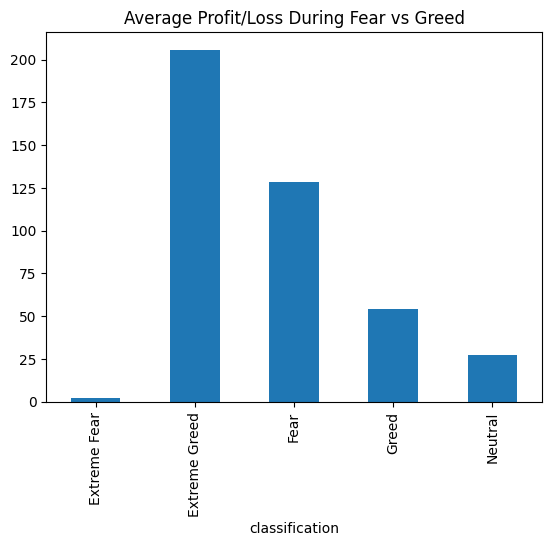

In [32]:
import matplotlib.pyplot as plt

analysis.plot(kind="bar", title="Average Profit/Loss During Fear vs Greed")
plt.savefig("/content/ds_utkarsha_kakulte/outputs/pnl_vs_sentiment.png")
plt.show()


In [33]:
!zip -r ds_utkarsha_kakulte.zip /content/ds_utkarsha_kakulte


updating: content/ds_utkarsha_kakulte/ (stored 0%)
updating: content/ds_utkarsha_kakulte/csv_files/ (stored 0%)
updating: content/ds_utkarsha_kakulte/outputs/ (stored 0%)
  adding: content/ds_utkarsha_kakulte/csv_files/trader_data.csv (deflated 80%)
  adding: content/ds_utkarsha_kakulte/csv_files/merged_data.csv (deflated 83%)
  adding: content/ds_utkarsha_kakulte/csv_files/fear_greed.csv (deflated 77%)
  adding: content/ds_utkarsha_kakulte/outputs/pnl_vs_sentiment.png (deflated 19%)
